#**Detecção de negatividade em tweets americanos**

## Introdução

###Descrição:

O projeto consiste em uma análise de dados de tweets atuais, para verificar se a rede social está ou não se tornando mais tóxica. Para tal, utilizamos um modelo de análise de sentimentos que verifica se uma sentença é negativa ou positiva. Por fim, utilizando a API do twitter, é colhido exemplos de tweets de vários anos, e então é feito as análises.

### Referências:<br>
[Dataset de treino](https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp)<br>
[API Twitter DocNow](https://github.com/DocNow/twarc)<br>
[API Twitter oficial](https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api)

##Iniciando o dataset

In [ ]:
import pandas as pd

In [ ]:
dataset_feelings = pd.read_csv("/content/train_feeling.csv")

In [ ]:
dataset_feelings.head()

,text,label
0,i can go from feeling so hopeless to so damned...,0
1,im grabbing a minute to post i feel greedy wrong,0
2,i am ever feeling nostalgic about the fireplac...,1
3,i am feeling grouchy,0
4,ive been feeling a little burdened lately wasn...,0


In [ ]:
dataset_feelings.shape

(18021, 2)

In [ ]:
dataset_feelings['label'].value_counts()

0    9854
1    8167
Name: label, dtype: int64

## Tratamento dos dados

In [ ]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = PorterStemmer()
corpus = []

In [ ]:
# Maiusculas [V] - Caracteres especiais [V] -  Stop_words [V] - Stemmer [V] - Strip [V]
def treat_data(text_data):
  text_data = str(text_data).lower()
  text_data = re.sub(r'[^a-z]', ' ', text_data)
  text_data = text_data.strip()
  split_data = text_data.split()

  all_stopwords = stopwords.words("english")
  all_stopwords.remove('not')
  all_stopwords.remove("didn't")
  all_stopwords.remove("don't")

  split_data = [stemmer.stem(word) for word in split_data if not word in all_stopwords]
  text_data = ' '.join(split_data)
  corpus.append(text_data)

In [ ]:
dataset_feelings.apply(treat_data, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
18016    None
18017    None
18018    None
18019    None
18020    None
Length: 18021, dtype: object

In [ ]:
print(corpus)

['text go feel hopeless damn label name dtype object', 'text im grab minut post feel greedi wrong label name dtype object', 'text ever feel nostalg fireplac label name dtype object', 'text feel grouchi label name dtype object', 'text ive feel littl burden late label name dtype object', 'text ive take milligram time recomm label name dtype object', 'text feel confus life teenag label name dtype object', 'text petrona year feel tha label name dtype object', 'text feel romant label name dtype object', 'text feel like make suffer label name dtype object', 'text feel run divin experi label name dtype object', 'text think easiest time year feel label name dtype object', 'text feel low energi thirsti label name dtype object', 'text immens sympathi gener point label name dtype object', 'text not feel reassur anxieti side label name dtype object', 'text didnt realli feel embarrass label name dtype object', 'text feel pretti pathet time label name dtype object', 'text start feel sentiment doll h

## Treinamento

In [ ]:
!pip install CatBoost
!pip install imbalanced-learn

     |████████████████████████████████| 76.3 MB 62 kB/s 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

from imblearn.under_sampling import RandomUnderSampler

In [ ]:
count_vector = CountVectorizer(max_features= 1500)

In [ ]:
x = count_vector.fit_transform(corpus).toarray()
y = dataset_feelings.iloc[:, -1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=0)

In [ ]:
x_train, y_train = undersample.fit_resample(x_train, y_train)

In [ ]:
classifier = CatBoostClassifier(random_state=42)
classifier.fit(x_train,y_train)

Learning rate set to 0.030958
0:	learn: 0.6918696	total: 59ms	remaining: 58.9s
1:	learn: 0.6910063	total: 68ms	remaining: 34s
2:	learn: 0.6903072	total: 76.6ms	remaining: 25.5s
3:	learn: 0.6891989	total: 85.1ms	remaining: 21.2s
4:	learn: 0.6884470	total: 93.8ms	remaining: 18.7s
5:	learn: 0.6877241	total: 102ms	remaining: 17s
6:	learn: 0.6869693	total: 111ms	remaining: 15.8s
7:	learn: 0.6861327	total: 120ms	remaining: 14.9s
8:	learn: 0.6853703	total: 129ms	remaining: 14.2s
9:	learn: 0.6846675	total: 139ms	remaining: 13.8s
10:	learn: 0.6836854	total: 152ms	remaining: 13.6s
11:	learn: 0.6830057	total: 161ms	remaining: 13.3s
12:	learn: 0.6824689	total: 170ms	remaining: 12.9s
13:	learn: 0.6818525	total: 179ms	remaining: 12.6s
14:	learn: 0.6811095	total: 188ms	remaining: 12.3s
15:	learn: 0.6802717	total: 197ms	remaining: 12.1s
16:	learn: 0.6796055	total: 212ms	remaining: 12.2s
17:	learn: 0.6786389	total: 224ms	remaining: 12.2s
18:	learn: 0.6780085	total: 233ms	remaining: 12s
19:	learn: 0.677

##Avaliações do modelo

In [ ]:
y_prediction = classifier.predict(x_test)

In [ ]:
conf_matrix = confusion_matrix(y_test,y_prediction)

In [ ]:
print(conf_matrix)

[[1571  444]
 [ 274 1316]]


In [ ]:
print(f"Accuracy: {accuracy_score(y_test,y_prediction)}")

Accuracy: 0.8008321775312066


##Teste do modelo

In [ ]:
def config_input(data):
  text_data = data.replace('RT ', ' ')
  text_data = text_data.lower()
  text_data = re.sub(r'[^a-z]', ' ', text_data)
  text_data = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+',' ', text_data)
  text_data = re.sub('[^a-zà-ú #]', ' ', text_data)
  text_data = text_data.strip()
  split_data = text_data.split()

  all_stopwords = stopwords.words("english")
  all_stopwords.remove('not')
  all_stopwords.remove("didn't")
  all_stopwords.remove("don't")

  split_data = [stemmer.stem(word) for word in split_data if not word in all_stopwords]
  text_data = ' '.join(split_data)

  data = [text_data]

  #count_vector = CountVectorizer(max_features= 1500)
  
  return count_vector.transform(data).toarray()


In [ ]:
data = 'Aww well I hope it all get sparred for you soon, you know where I am if you need anything :)'
input = config_input(data)
if 1 in classifier.predict(input):
  print('positive')
else:
  print('negative')

positive


## Obtenção do dataset de avaliação

### Configuração

In [ ]:
pip install --upgrade twarc

In [ ]:
pip install --upgrade twarc-csv

In [ ]:
!twarc2 configure

Please enter your Bearer Token (leave blank to skip to API key configuration): AAAAAAAAAAAAAAAAAAAAAKGbVAEAAAAAPHhCLZHyJIu%2FZ0M%2BUvke4zfkyso%3DI9bZpttNFhgdIvXCxchuH381hZLazhb28ezxKBNDEpWOR6aqp9
(Optional) Add API keys and secrets for user mode authentication [y or n]? n

Your keys have been written to /root/.config/twarc/config


✨ ✨ ✨  Happy twarcing! ✨ ✨ ✨



### Requisição

In [ ]:
!twarc2 sample --limit 40000 feel_data.jsonl
!twarc2 csv feel_data.jsonl feel_data.csv


👋  Hi I don't see a configuration file yet, so let's make one.

Please follow these steps:

1. visit https://developer.twitter.com/en/portal/
2. create a project and an app
3. go to your Keys and Tokens and generate your keys

Please enter your Bearer Token (leave blank to skip to API key configuration): 
Aborted!

👋  Hi I don't see a configuration file yet, so let's make one.

Please follow these steps:

1. visit https://developer.twitter.com/en/portal/
2. create a project and an app
3. go to your Keys and Tokens and generate your keys

Please enter your Bearer Token (leave blank to skip to API key configuration): 

## Tratamento da base de avaliação

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("feeling_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,21,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset.head()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,text,lang,source,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,reply_settings,possibly_sensitive,withheld.scope,withheld.copyright,withheld.country_codes,entities.annotations,entities.cashtags,entities.hashtags,entities.mentions,entities.urls,context_annotations,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.url,author.verified,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,geo.coordinates.coordinates,geo.coordinates.type,geo.country,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73
0,1461064139028193281,1461064139028193281,NaN,1.461064e+18,NaN,1356588046616043527,NaN,7.846840e+17,NaN,2021-11-17T20:10:10.000Z,"Fantastic move, see me change color #BigData",en,Twitter,0,0,0,1,everyone,False,NaN,NaN,NaN,NaN,NaN,"[{""start"": 36, ""end"": 44, ""tag"": ""BigData""}]",NaN,NaN,"[{""domain"": {""id"": ""65"", ""name"": ""Interests an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1356588046616043527,2021-02-02T12:59:47.000Z,uCloudifyAI,AI Bot by uCloudify.com,Boop beep... I'm a bot!\n\nMission: Business r...,NaN,NaN,NaN,NaN,"[{""start"": 0, ""end"": 23, ""url"": ""https://t.co/...",NaN,NaN,https://pbs.twimg.com/profile_images/142320628...,False,442,0,7,59562,https://t.co/8xOSKqQaoj,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-17T20:10:21+00:00,https://api.twitter.com/2/tweets/sample/stream...,2.8.1,NaN
1,1461064139019886595,1461062304351629321,1.461063e+18,NaN,NaN,1415853154432954368,1.398213e+18,NaN,NaN,2021-11-17T20:10:10.000Z,@gxbriellecrvg primeira vez usando icon de jog...,pt,Twitter for Android,0,0,0,0,everyone,False,NaN,NaN,NaN,NaN,NaN,NaN,"[{""start"": 0, ""end"": 14, ""username"": ""gxbriell...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415853154432954368,2021-07-16T01:57:59.000Z,swpolo9,Polin romântico 🌹,escutando: Harry Styles - Sing of the Times 🎶,NaN,NaN,NaN,NaN,NaN,"""88'15"" ""91'23""",1.429824e+18,https://pbs.twimg.com/profile_images/146106220...,False,1069,1168,4,25287,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-17T20:10:21+00:00,https://api.twitter.com/2/tweets/sample/stream...,2.8.1,NaN
2,1461064139024080896,1461064139024080896,NaN,1.460989e+18,NaN,1266315979,NaN,2.353497e+08,NaN,2021-11-17T20:10:10.000Z,Shebi they gave you money for moaning ? Why yo...,en,Twitter for Android,25,0,19,13,everyone,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""start"": 94, ""end"": 117, ""url"": ""https://t.c...","[{""domain"": {""id"": ""65"", ""name"": ""Interests an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1266315979,2013-03-14T06:00:01.000Z,Ebererachael,EbereChristian,I'm a realtor.Pls contact me for your genuine ...,NaN,NaN,NaN,NaN,"[{""start"": 0, ""end"": 23, ""url"": ""https://t.co/...",Lagos,1.458334e+18,https://pbs.twimg.com/profile_images/144509559...,False,2906,2402,118,98766,https://t.co/ilkadZpSIi,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-17T20:10:21+00:00,https://api.twitter.com/2/tweets/sample/stream...,2.8.1,NaN
3,1461064139049246730,1461064139049246730,NaN,

In [ ]:
dataset.shape

(42000, 74)

In [ ]:
dataset = dataset.drop(columns=["id", "reply_settings", "conversation_id", "possibly_sensitive","referenced_tweets.replied_to.id", "referenced_tweets.retweeted.id", "referenced_tweets.quoted.id", "author_id", "in_reply_to_user_id", "retweeted_user_id", "quoted_user_id", "withheld.scope", "withheld.copyright", "withheld.country_codes", "entities.annotations", "entities.cashtags", "entities.hashtags", "entities.mentions", "entities.urls", "context_annotations", "attachments.media", "attachments.media_keys", "attachments.poll.duration_minutes", "attachments.poll.end_datetime", "attachments.poll.id", "attachments.poll.options", "attachments.poll.voting_status", "attachments.poll_ids", "author.id", "author.username", "author.name", "author.description", "author.entities.description.cashtags", "author.entities.description.hashtags", "author.entities.description.mentions", "author.entities.description.urls", "author.entities.url.urls", "author.pinned_tweet_id", "author.profile_image_url", "author.protected", "author.url", "author.withheld.scope", "author.withheld.copyright", "author.withheld.country_codes", "geo.coordinates.coordinates", "geo.coordinates.type", "geo.country", "geo.country_code", "geo.full_name", "geo.geo.bbox", "geo.geo.type", "geo.id", "geo.name", "geo.place_id", "geo.place_type", "__twarc.retrieved_at", "__twarc.url", "__twarc.version", "Unnamed: 73", "created_at", "source", "public_metrics.quote_count", "author.location", "author.public_metrics.listed_count"])

In [ ]:
dataset.shape

(42000, 10)

In [ ]:
dataset.columns

Index(['text', 'lang', 'public_metrics.like_count',
       'public_metrics.reply_count', 'public_metrics.retweet_count',
       'author.created_at', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.tweet_count', 'author.verified'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

text                                     0
lang                                     0
public_metrics.like_count                0
public_metrics.reply_count               0
public_metrics.retweet_count             0
author.created_at                        0
author.public_metrics.followers_count    0
author.public_metrics.following_count    0
author.public_metrics.tweet_count        0
author.verified                          0
dtype: int64

In [ ]:
dataset.lang.value_counts()

en     16529
es      4835
und     4544
pt      2902
ar      2710
ja      2353
tr      2189
fr      1245
th       490
it       462
in       450
ko       436
de       384
fa       316
pl       288
ru       267
tl       208
nl       190
hi       119
ca       113
el        99
et        87
zh        85
ur        82
ht        75
sv        64
cs        45
fi        42
no        31
da        31
iw        30
eu        27
uk        26
cy        24
lt        21
sr        20
hu        20
bn        20
is        18
sl        18
ro        17
vi        16
lv        16
ta        14
am        12
ckb        7
bg         6
te         5
dv         3
mr         3
gu         2
ps         2
hy         1
ml         1
Name: lang, dtype: int64

In [ ]:
remove_data = dataset.loc[(dataset['lang'] != 'en')]
dataset = dataset.drop(remove_data.index)

In [ ]:
dataset.lang.value_counts()

en    16529
Name: lang, dtype: int64

In [ ]:
replacer = {'author.verified': {False: 0, True: 1}}

In [ ]:
dataset = dataset.replace(replacer)

In [ ]:
def get_year_created(dataset):
  year = []
  for date in dataset['author.created_at']:
    year.append(int(date[:4]))
  return year

In [ ]:
year = get_year_created(dataset)

In [ ]:
dataset.drop(columns={'author.created_at'})
dataset['author.created_at'] = year

In [ ]:
dataset['author.created_at'].value_counts()

2021    3477
2020    2242
2019    1287
2011    1161
2009    1140
2018    1056
2012    1013
2017     941
2013     854
2016     830
2014     817
2015     776
2010     735
2008     158
2007      38
2006       4
Name: author.created_at, dtype: int64

In [ ]:
dataset.head()

,text,lang,public_metrics.like_count,public_metrics.reply_count,public_metrics.retweet_count,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.verified
0,"Fantastic move, see me change color #BigData",en,0,0,1,2021,442,0,59562,0
2,Shebi they gave you money for moaning ? Why yo...,en,25,19,13,2013,2906,2402,98766,0
3,you didn't have to tell me Kyle Rittenhouse is...,en,327,14,51,2017,1864,3512,256132,0
4,@Abayomialege We got you. See you on 11/21 #Po...,en,0,0,0,2019,54599,25,3758,1
5,@Y0GURT4IDEN UR JUST A HIGHSCHOOL BULLY 🤬 /j /lh,en,0,0,0,2020,1498,1089,10157,0


## Predição da base de avaliação

In [ ]:
def sentiment_predict(text):
  # 1 -> positivo
  # 0 -> negativo
  input = config_input(text)
  return classifier.predict(input)[0]

In [ ]:
label = dataset['text'].apply(sentiment_predict)

In [ ]:
dataset['label'] = label

In [ ]:
dataset.head()

,text,lang,public_metrics.like_count,public_metrics.reply_count,public_metrics.retweet_count,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.verified,label
0,"Fantastic move, see me change color #BigData",en,0,0,1,2021,442,0,59562,0,1
2,Shebi they gave you money for moaning ? Why yo...,en,25,19,13,2013,2906,2402,98766,0,0
3,you didn't have to tell me Kyle Rittenhouse is...,en,327,14,51,2017,1864,3512,256132,0,0
4,@Abayomialege We got you. See you on 11/21 #Po...,en,0,0,0,2019,54599,25,3758,1,0
5,@Y0GURT4IDEN UR JUST A HIGHSCHOOL BULLY 🤬 /j /lh,en,0,0,0,2020,1498,1089,10157,0,0


In [ ]:
dataset['label'].value_counts()

0    9751
1    6778
Name: label, dtype: int64

In [ ]:
#44,62% mais negativa

## Avaliação

In [ ]:
!pip install wordcloud 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset.head()

,text,lang,public_metrics.like_count,public_metrics.reply_count,public_metrics.retweet_count,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.verified,label
0,"Fantastic move, see me change color #BigData",en,0,0,1,2021,442,0,59562,0,1
2,Shebi they gave you money for moaning ? Why yo...,en,25,19,13,2013,2906,2402,98766,0,0
3,you didn't have to tell me Kyle Rittenhouse is...,en,327,14,51,2017,1864,3512,256132,0,0
4,@Abayomialege We got you. See you on 11/21 #Po...,en,0,0,0,2019,54599,25,3758,1,0
5,@Y0GURT4IDEN UR JUST A HIGHSCHOOL BULLY 🤬 /j /lh,en,0,0,0,2020,1498,1089,10157,0,0


In [ ]:
negative_data = dataset.loc[dataset['label'] == 0]
positive_data = dataset.loc[dataset['label'] == 1]

In [ ]:
for i, text in enumerate(negative_data['text']):
  if i == 159:
    print(text)

Poland demands NATO step in to deal with Muslim migrant crisis on border with Belarus https://t.co/dGluL0eEFY https://t.co/qEfMBTuOAY


In [ ]:
for i, text in enumerate(positive_data['text']):
  if i == 21:
    print(text)

BREAKING: The Conservatives just voted against Labour’s call for a ban on dodgy second jobs.\n\nEven when Labour gifted them a chance to do the right thing, Tory MPs just couldn't manage it.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87c9d2b490>,
      dtype=object)

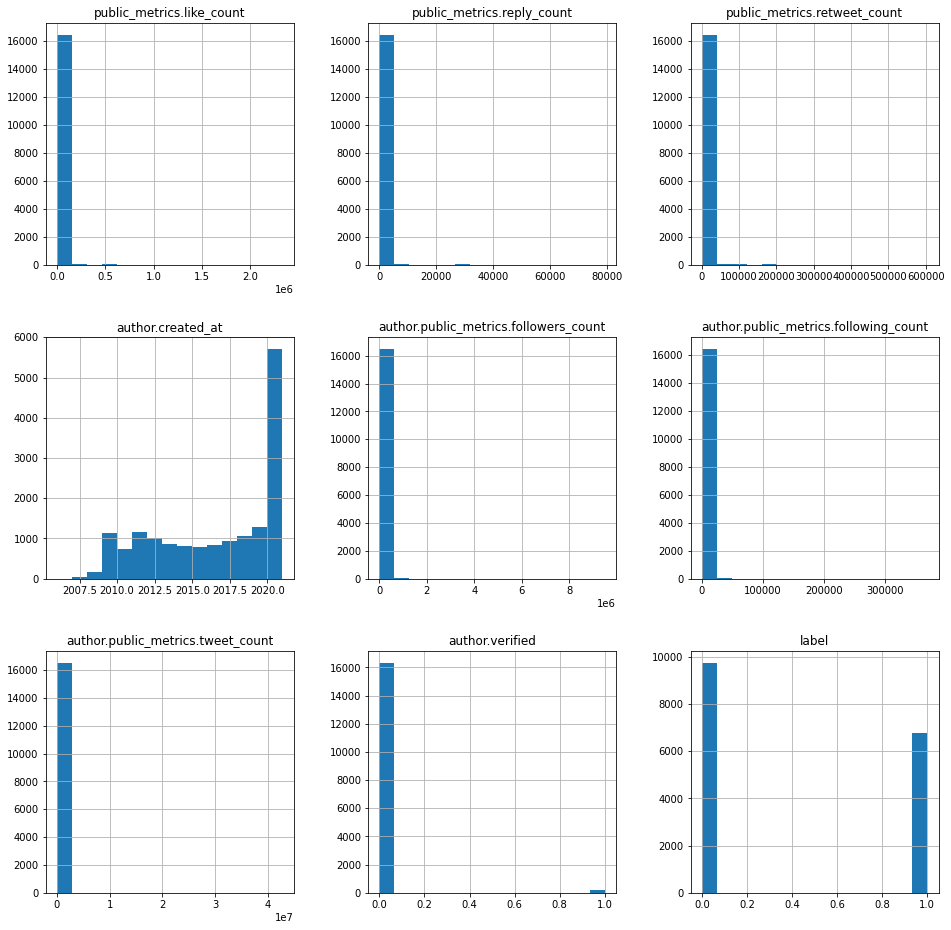

In [ ]:
dataset.hist(bins=15,figsize=(16,16))

Text(0.5, 1.0, 'Distribuição de tweets por label')

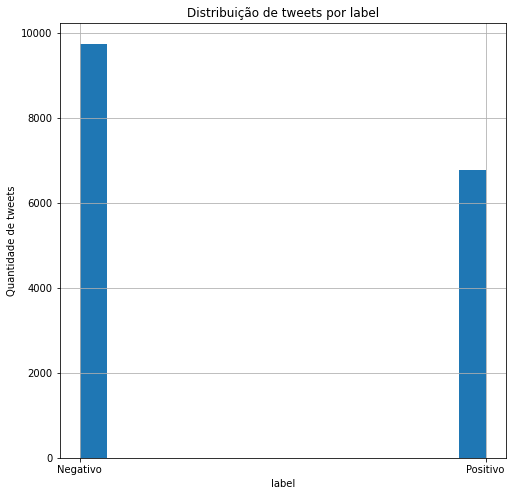

In [ ]:
dataset['label'].hist(bins=15,figsize=(8,8))
plt.xticks([0, 1], labels=['Negativo', 'Positivo'], )
plt.ylabel("Quantidade de tweets")
plt.xlabel("label")
plt.title("Distribuição de tweets por label")

Text(0.5, 1.0, 'Distribuição dos labels')

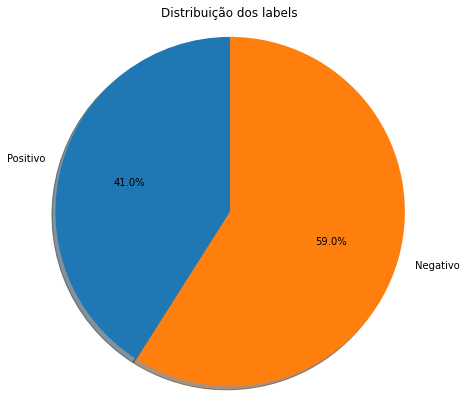

In [ ]:
fig, ax1 = plt.subplots(figsize=(7,7))
sizes = [len(dataset.loc[dataset['label'] == 1]), len(dataset.loc[dataset['label'] == 0])]
ax1.pie(sizes, labels=['Positivo', 'Negativo'], autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribuição dos labels")

In [ ]:
dataset.describe()

,public_metrics.like_count,public_metrics.reply_count,public_metrics.retweet_count,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.verified,label
count,1.652900e+04,16529.000000,16529.000000,16529.000000,1.652900e+04,16529.000000,1.652900e+04,16529.000000,16529.000000
mean,4.986383e+03,127.341279,1304.622361,2016.266320,5.997962e+03,1303.788795,4.336072e+04,0.011676,0.410067
std,3.583051e+04,1462.682197,9355.375577,4.197779,1.019240e+05,4314.910744,3.568289e+05,0.107428,0.491860
min,0.000000e+00,0.000000,0.000000,2006.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,2012.000000,9.000000e+01,184.000000,2.109000e+03,0.000000,0.000000
50%,1.000000e+00,0.000000,1.000000,2017.000000,3.580000e+02,491.000000,1.030700e+04,0.000000,0.000000
75%,4.000000e+02,9.000000,109.000000,2020.000000,1.234000e+03,1211.000000,3.742100e+04,0.000000,1.000000
max,2.331997e+06,79257.000000,604087.000000,2021.000000,9.493354e+06,368292.000000,4.273245e+07,1.000000,1.000000


In [ ]:
correlation = dataset.corr()
correlation.style.background_gradient(cmap = 'coolwarm')

,public_metrics.like_count,public_metrics.reply_count,public_metrics.retweet_count,author.created_at,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.verified,label
public_metrics.like_count,1.000000,0.572228,0.890756,-0.002438,-0.006533,-0.019103,-0.006316,-0.013754,-0.003469
public_metrics.reply_count,0.572228,1.000000,0.708311,0.018960,-0.003787,-0.005872,-0.005491,-0.008951,0.002085
public_metrics.retweet_count,0.890756,0.708311,1.000000,0.006786,-0.006758,-0.019610,-0.007209,-0.013642,-0.006127
author.created_at,-0.002438,0.018960,0.006786,1.000000,-0.054609,-0.119135,-0.074202,-0.144550,-0.021571
author.public_metrics.followers_count,-0.006533,-0.003787,-0.006758,-0.054609,1.000000,0.097472,0.026049,0.278781,0.006766
author.public_metrics.following_count,-0.019103,-0.005872,-0.019610,-0.119135,0.097472,1.000000,0.075552,0.105923,0.025131
author.public_metrics.tweet_count,-0.006316,-0.005491,-0.007209,-0.074202,0.026049,0.075552,1.000000,0.017030,-0.005518
author.verified,-0.013754,-0.008951,-0.013642,-0.144550,0.278781,0.105923,0.017030,1.000000,0.030752
label,-0.003469,0.002085,-0.006127,-0.021571,0.006766,0.025131,-0.005518,0.030752,1.000000


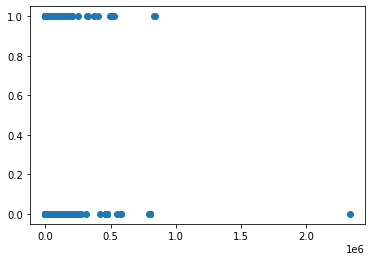

In [ ]:
plt.scatter(dataset['public_metrics.like_count'], dataset['label'])

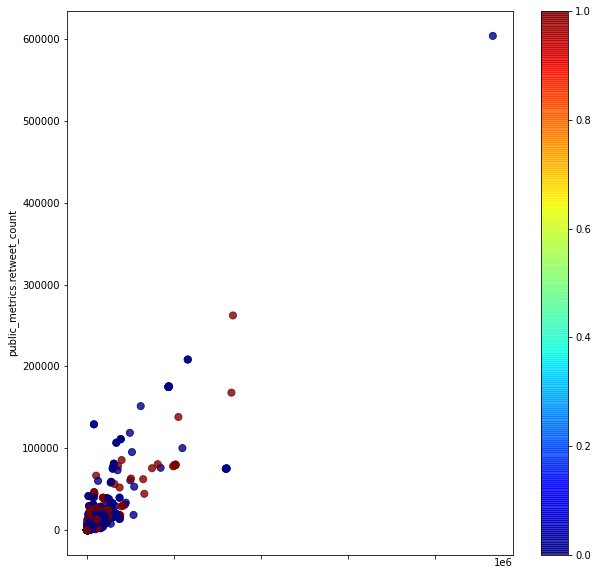

In [ ]:
dataset.plot(kind ='scatter', x='public_metrics.like_count', y='public_metrics.retweet_count',
                   alpha = 0.8, c = dataset['label'], s = 50,
                   cmap = plt.get_cmap('jet'), figsize = (10,10))

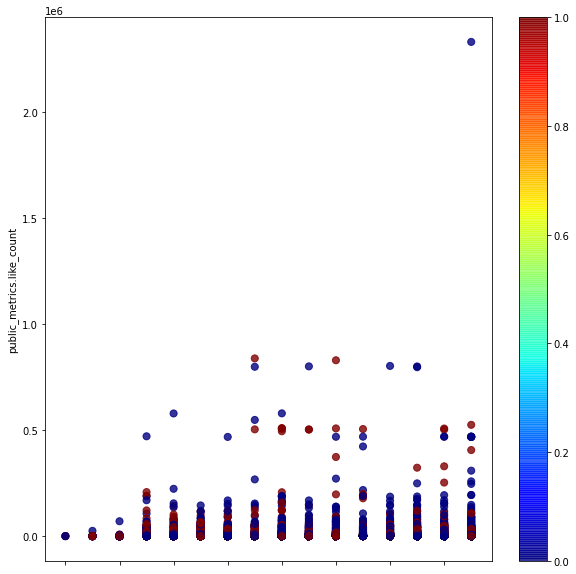

In [ ]:
dataset.plot(kind ='scatter', x='author.created_at', y='public_metrics.like_count',
                   alpha = 0.8, c = dataset['label'], s = 50,
                   cmap = plt.get_cmap('jet'), figsize = (10,10))

In [ ]:
period_mean = []
periods = dataset['author.created_at'].unique()
for period in periods:
  period_data = dataset.loc[dataset['author.created_at'] == period]
  period_mean.append(sum(period_data['label']) / len(period_data['label']))

Text(0.5, 1.0, 'Média do label X Ano de criação do usuário')

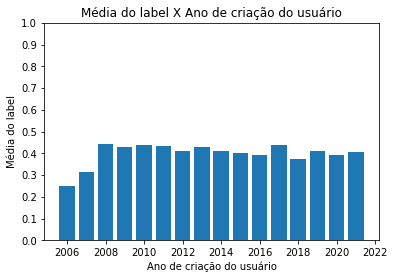

In [ ]:
plt.bar(periods, period_mean, width =0.8)

plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylabel("Média do label")
plt.xlabel("Ano de criação do usuário")
plt.title("Média do label X Ano de criação do usuário")

In [ ]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [ ]:
def config_data(data):
  text_data = data.replace('RT ', ' ')
  text_data = text_data.lower()
  text_data = re.sub(r'[^a-z]', ' ', text_data)
  text_data = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+',' ', text_data)
  text_data = re.sub('http',' ', text_data)
  text_data = re.sub('co',' ', text_data)
  text_data = re.sub('amp',' ', text_data)
  text_data = re.sub('one',' ', text_data)
  text_data = re.sub('[^a-zà-ú #]', ' ', text_data)
  text_data = text_data.strip()
  split_data = text_data.split()

  all_stopwords = stopwords.words("english")

  split_data = [stemmer.stem(word) for word in split_data if not word in all_stopwords]
  text_data = ' '.join(split_data)

  data = text_data
  
  return data

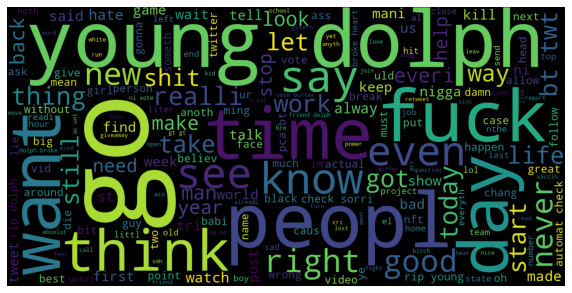

In [ ]:
negative_data = []
for sentence in dataset.loc[dataset['label'] == 0]['text']:
  negative_data.append(config_data(sentence))

all_summary = " ".join(word for word in negative_data)
all_stopwords = stopwords.words("english")

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("Most_used_negative.png")

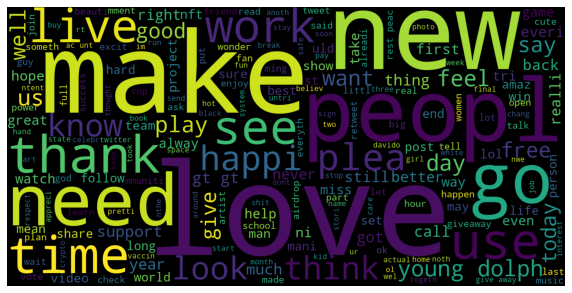

In [ ]:
positive_data = []
for sentence in dataset.loc[dataset['label'] == 1]['text']:
  positive_data.append(config_data(sentence))

all_summary = " ".join(word for word in positive_data)
all_stopwords = stopwords.words("english")

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("Most_used_positive.png")

##Conclusão

Tivemos como conclusão, que, de fato, o twitter é uma rede social com tendências negativas,.